In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [2]:
train= pd.read_csv('training.csv')

In [3]:
test= pd.read_csv('testing.csv')

In [4]:
df= pd.concat([train,test], axis=0)

In [5]:
df.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [6]:
df.shape

(523, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                523 non-null    object 
 1   b1                   523 non-null    int64  
 2   b2                   523 non-null    int64  
 3   b3                   523 non-null    int64  
 4   b4                   523 non-null    int64  
 5   b5                   523 non-null    int64  
 6   b6                   523 non-null    int64  
 7   b7                   523 non-null    int64  
 8   b8                   523 non-null    int64  
 9   b9                   523 non-null    int64  
 10  pred_minus_obs_H_b1  523 non-null    float64
 11  pred_minus_obs_H_b2  523 non-null    float64
 12  pred_minus_obs_H_b3  523 non-null    float64
 13  pred_minus_obs_H_b4  523 non-null    float64
 14  pred_minus_obs_H_b5  523 non-null    float64
 15  pred_minus_obs_H_b6  523 non-null    flo

In [8]:
df.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,59.887189,39.380497,62.304015,98.156788,58.338432,99.747610,87.657744,27.873805,59.726577,53.906004,...,-4.194283,-20.017304,-1.056195,-4.368203,-21.411568,-0.977514,-4.619809,-18.937228,-1.652199,-4.201377
std,12.345004,15.930120,15.937658,12.881210,11.336637,10.151598,16.398751,8.076700,9.291151,12.754964,...,9.306667,3.806830,1.375642,2.053012,4.901451,0.495208,1.352096,4.147427,1.371180,1.518350
min,31.000000,23.000000,47.000000,54.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,51.500000,28.000000,52.000000,90.000000,50.000000,93.000000,76.000000,24.000000,54.500000,45.565000,...,-5.025000,-22.505000,-1.795000,-5.625000,-24.175000,-1.210000,-5.525000,-21.820000,-2.370000,-4.940000
50%,58.000000,32.000000,56.000000,96.000000,55.000000,97.000000,88.000000,25.000000,57.000000,55.410000,...,-1.880000,-19.990000,-1.030000,-4.460000,-20.830000,-0.980000,-4.640000,-19.050000,-1.580000,-4.130000
75%,67.000000,48.000000,67.000000,107.000000,64.000000,104.000000,99.000000,27.000000,60.000000,62.340000,...,0.915000,-18.080000,-0.300000,-2.840000,-18.735000,-0.730000,-3.810000,-16.610000,-0.915000,-3.245000
max,107.000000,160.000000,196.000000,172.000000,100.000000,138.000000,139.000000,84.000000,114.000000,86.080000,...,9.580000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


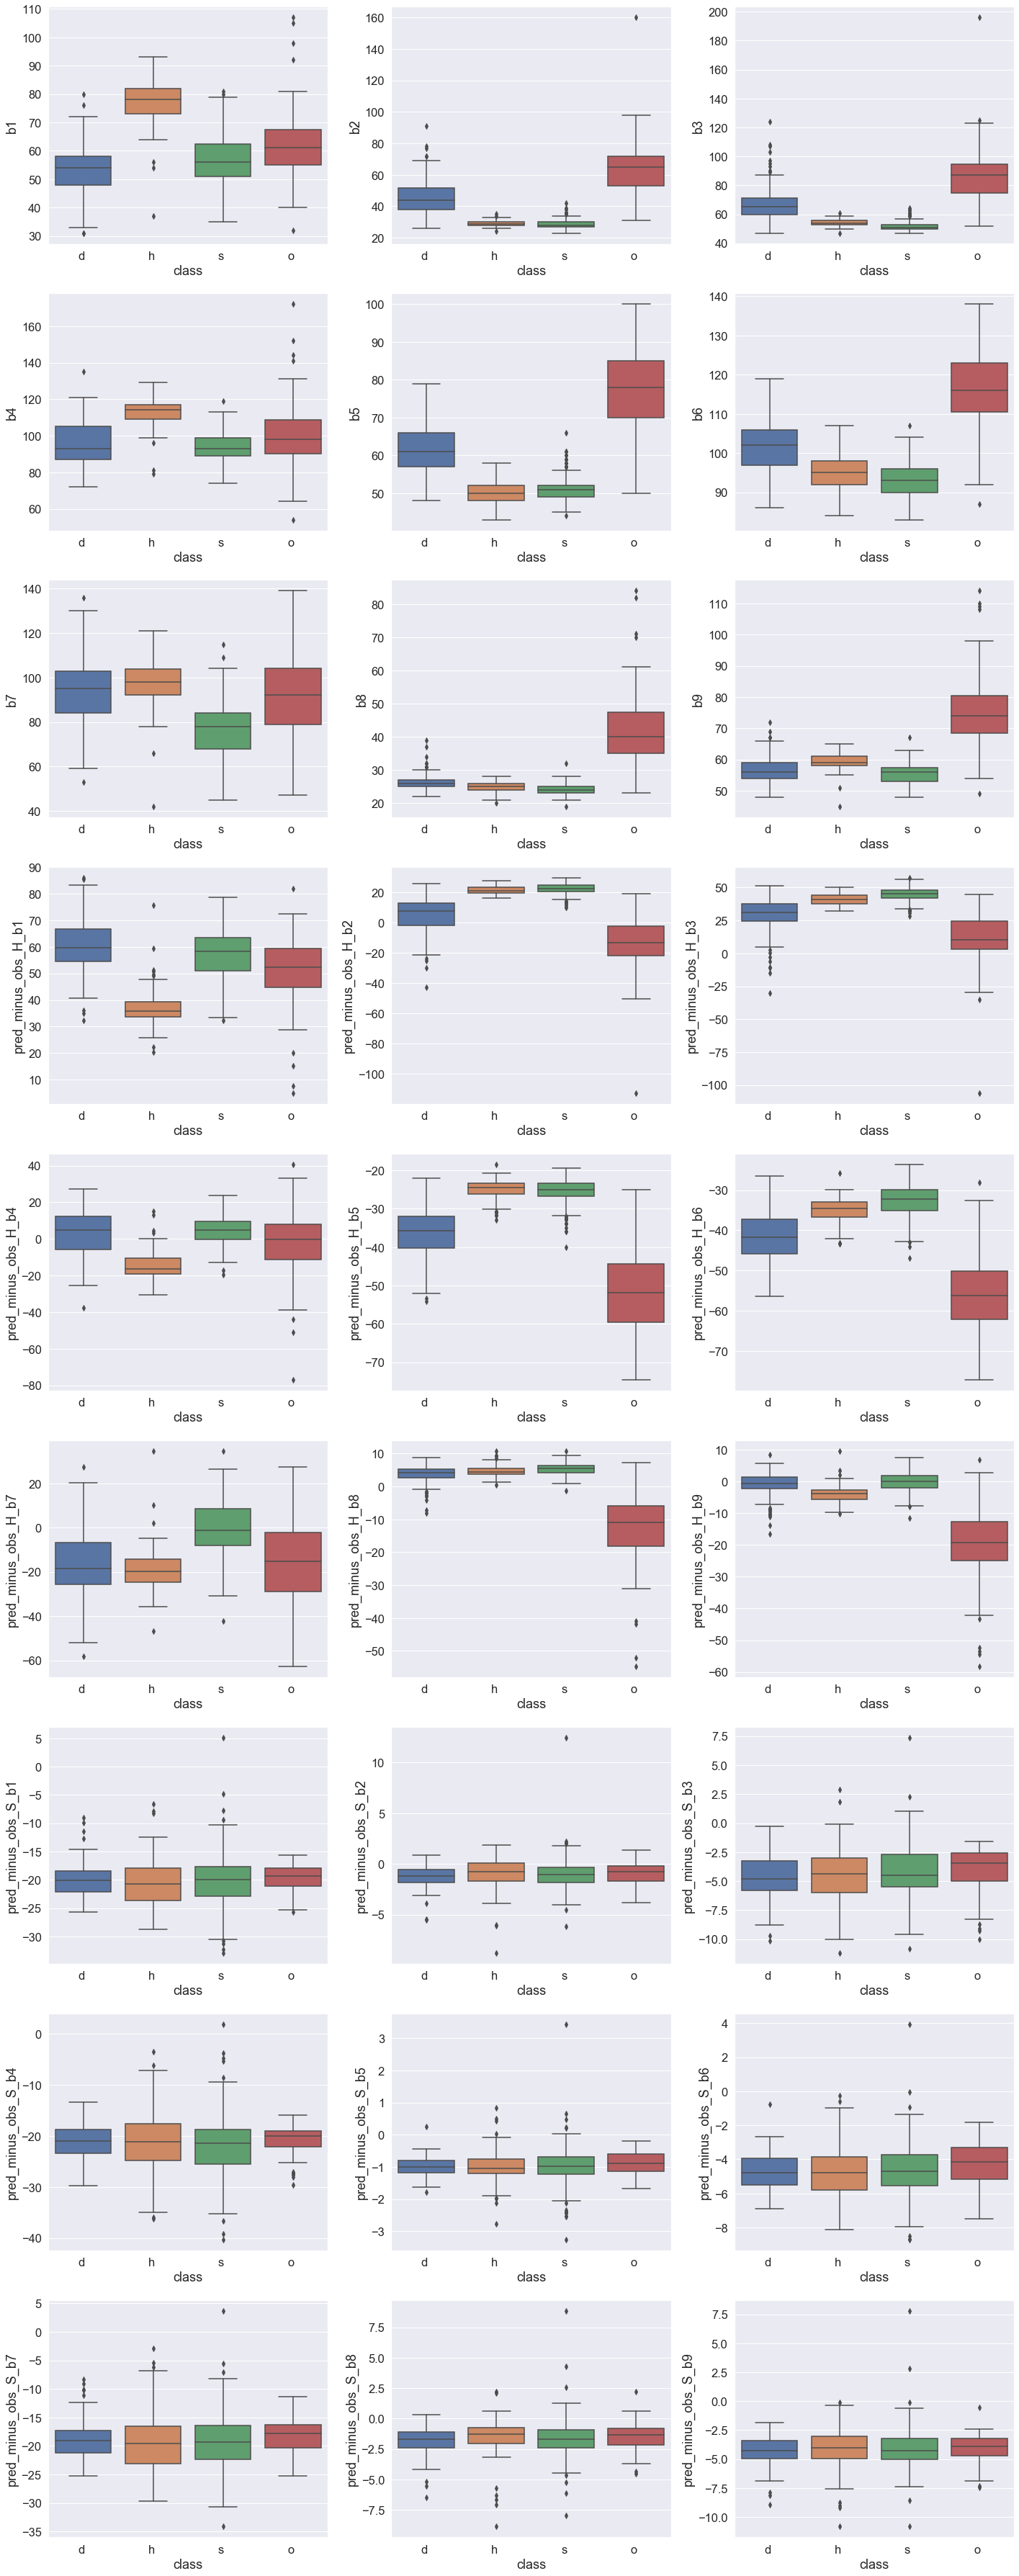

In [9]:
temp = df.iloc[:, 1:]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(ncols=3, nrows=9, figsize=(20, 50))
index = 0
ax = ax.flatten()
for key, val in temp.items():
    sns.boxplot(x=df["class"], y=key, data=temp, ax=ax[index])
    index += 1
plt.tight_layout()

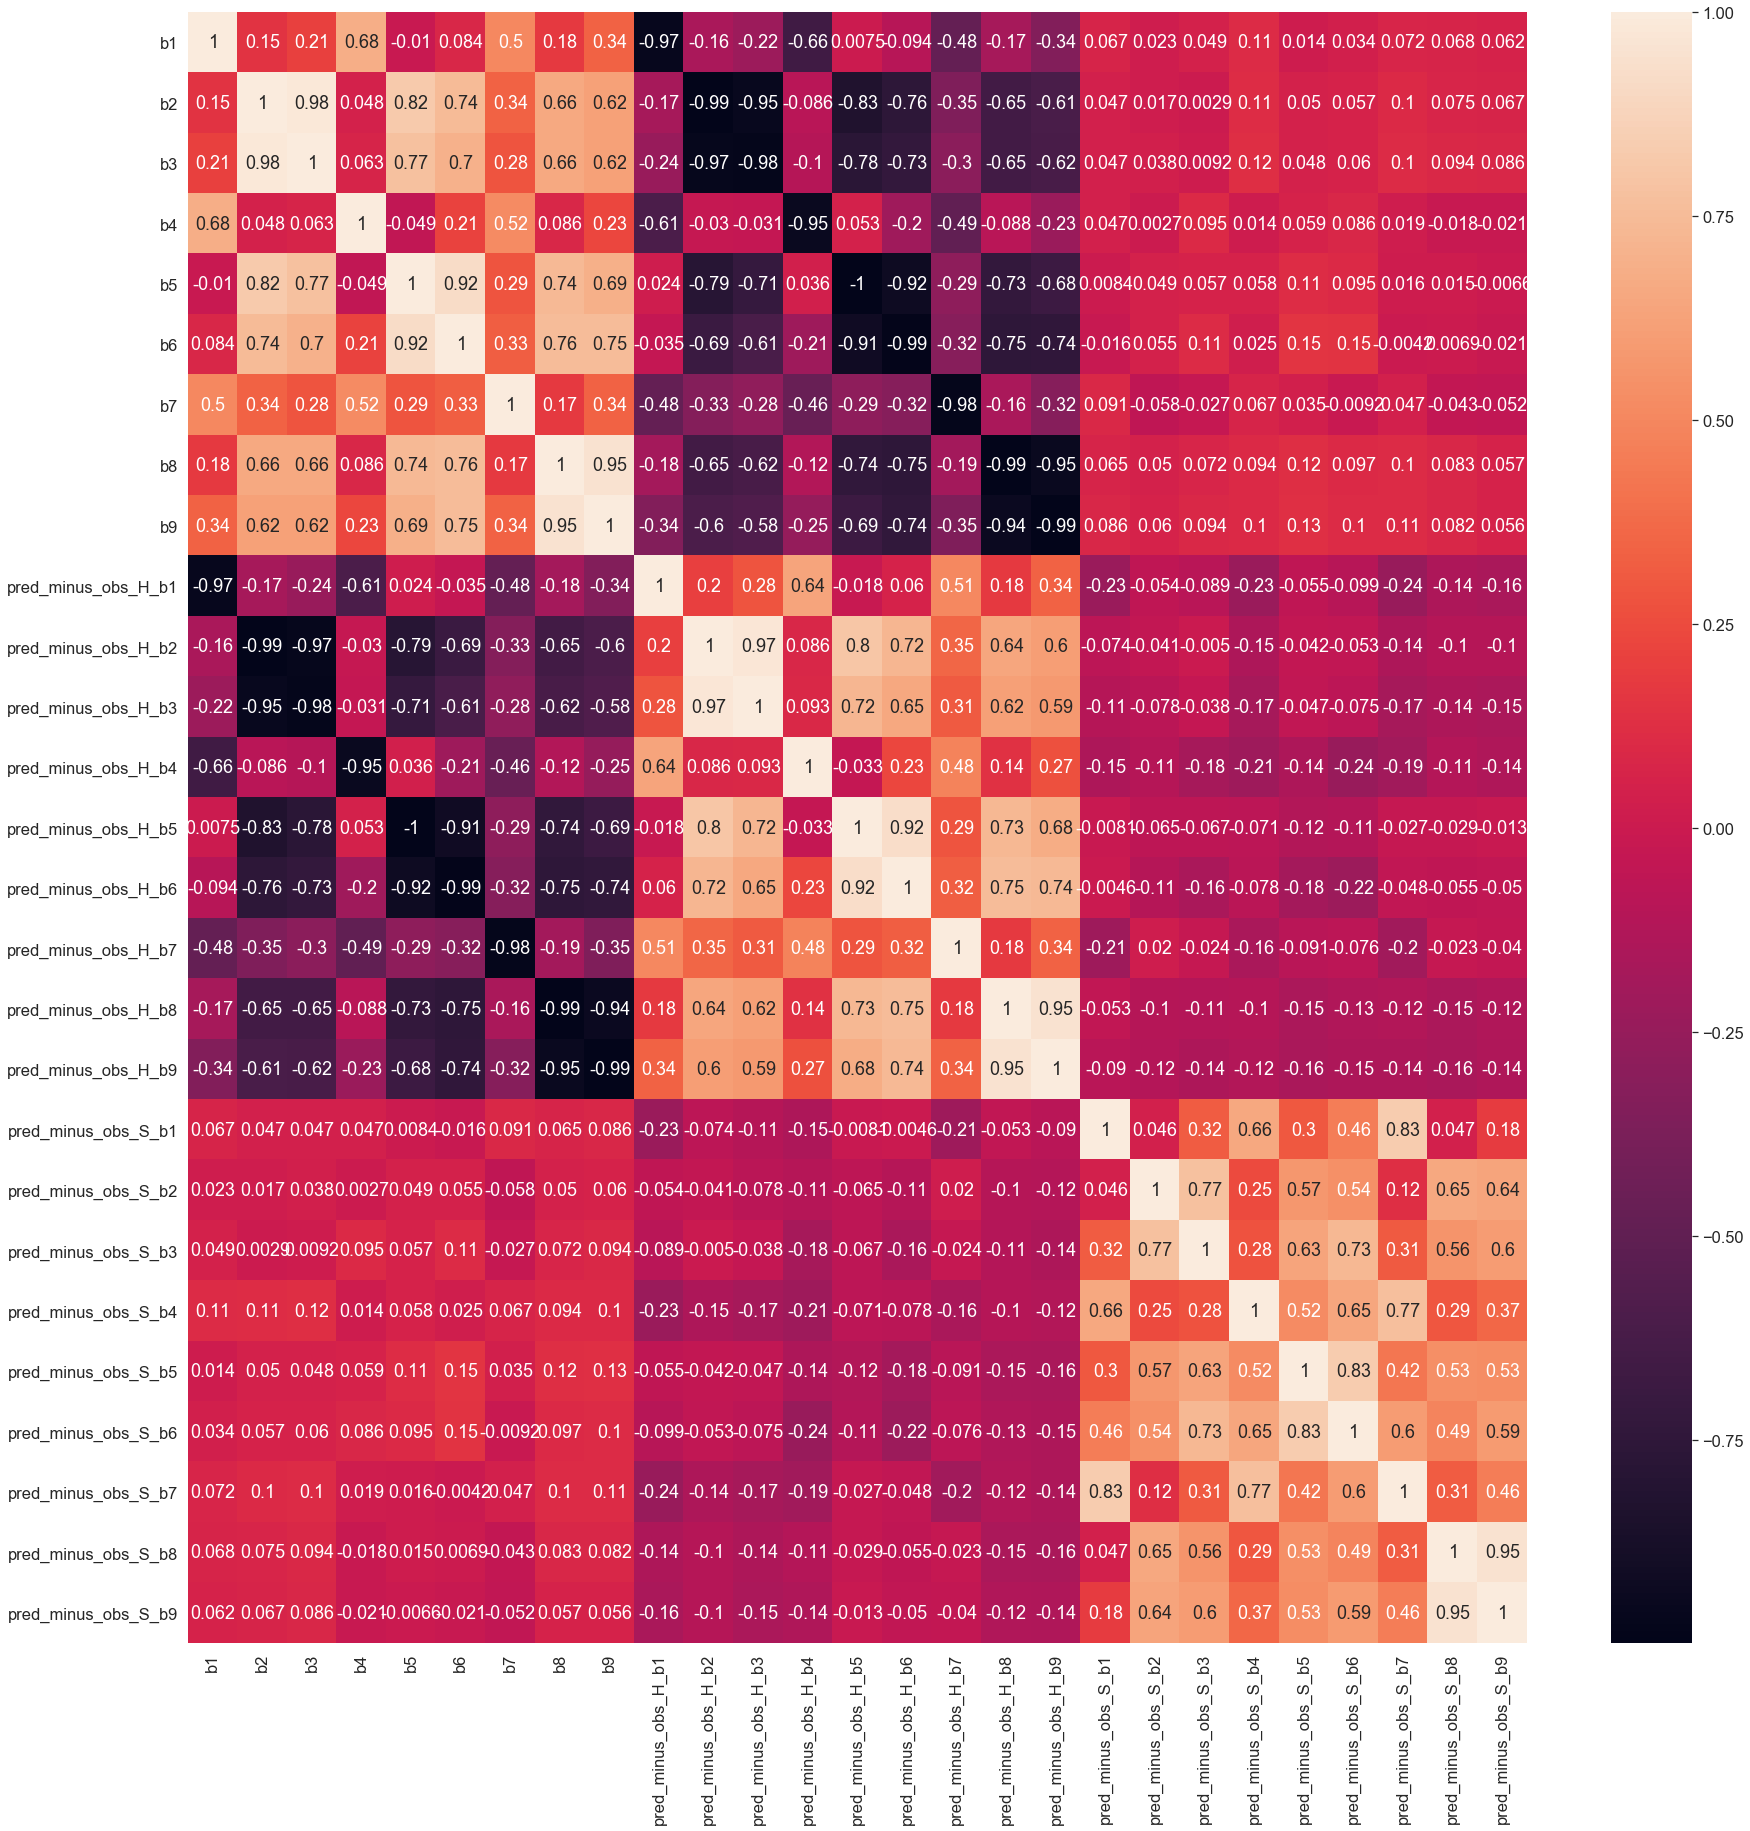

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

In [11]:
df1= df.drop(['pred_minus_obs_H_b1','b3','pred_minus_obs_H_b3','pred_minus_obs_H_b4','pred_minus_obs_H_b6','b6','pred_minus_obs_H_b7','b8','pred_minus_obs_H_b8','pred_minus_obs_S_b1','pred_minus_obs_S_b8','pred_minus_obs_H_b2','pred_minus_obs_H_b5','pred_minus_obs_H_b9'], axis=1)

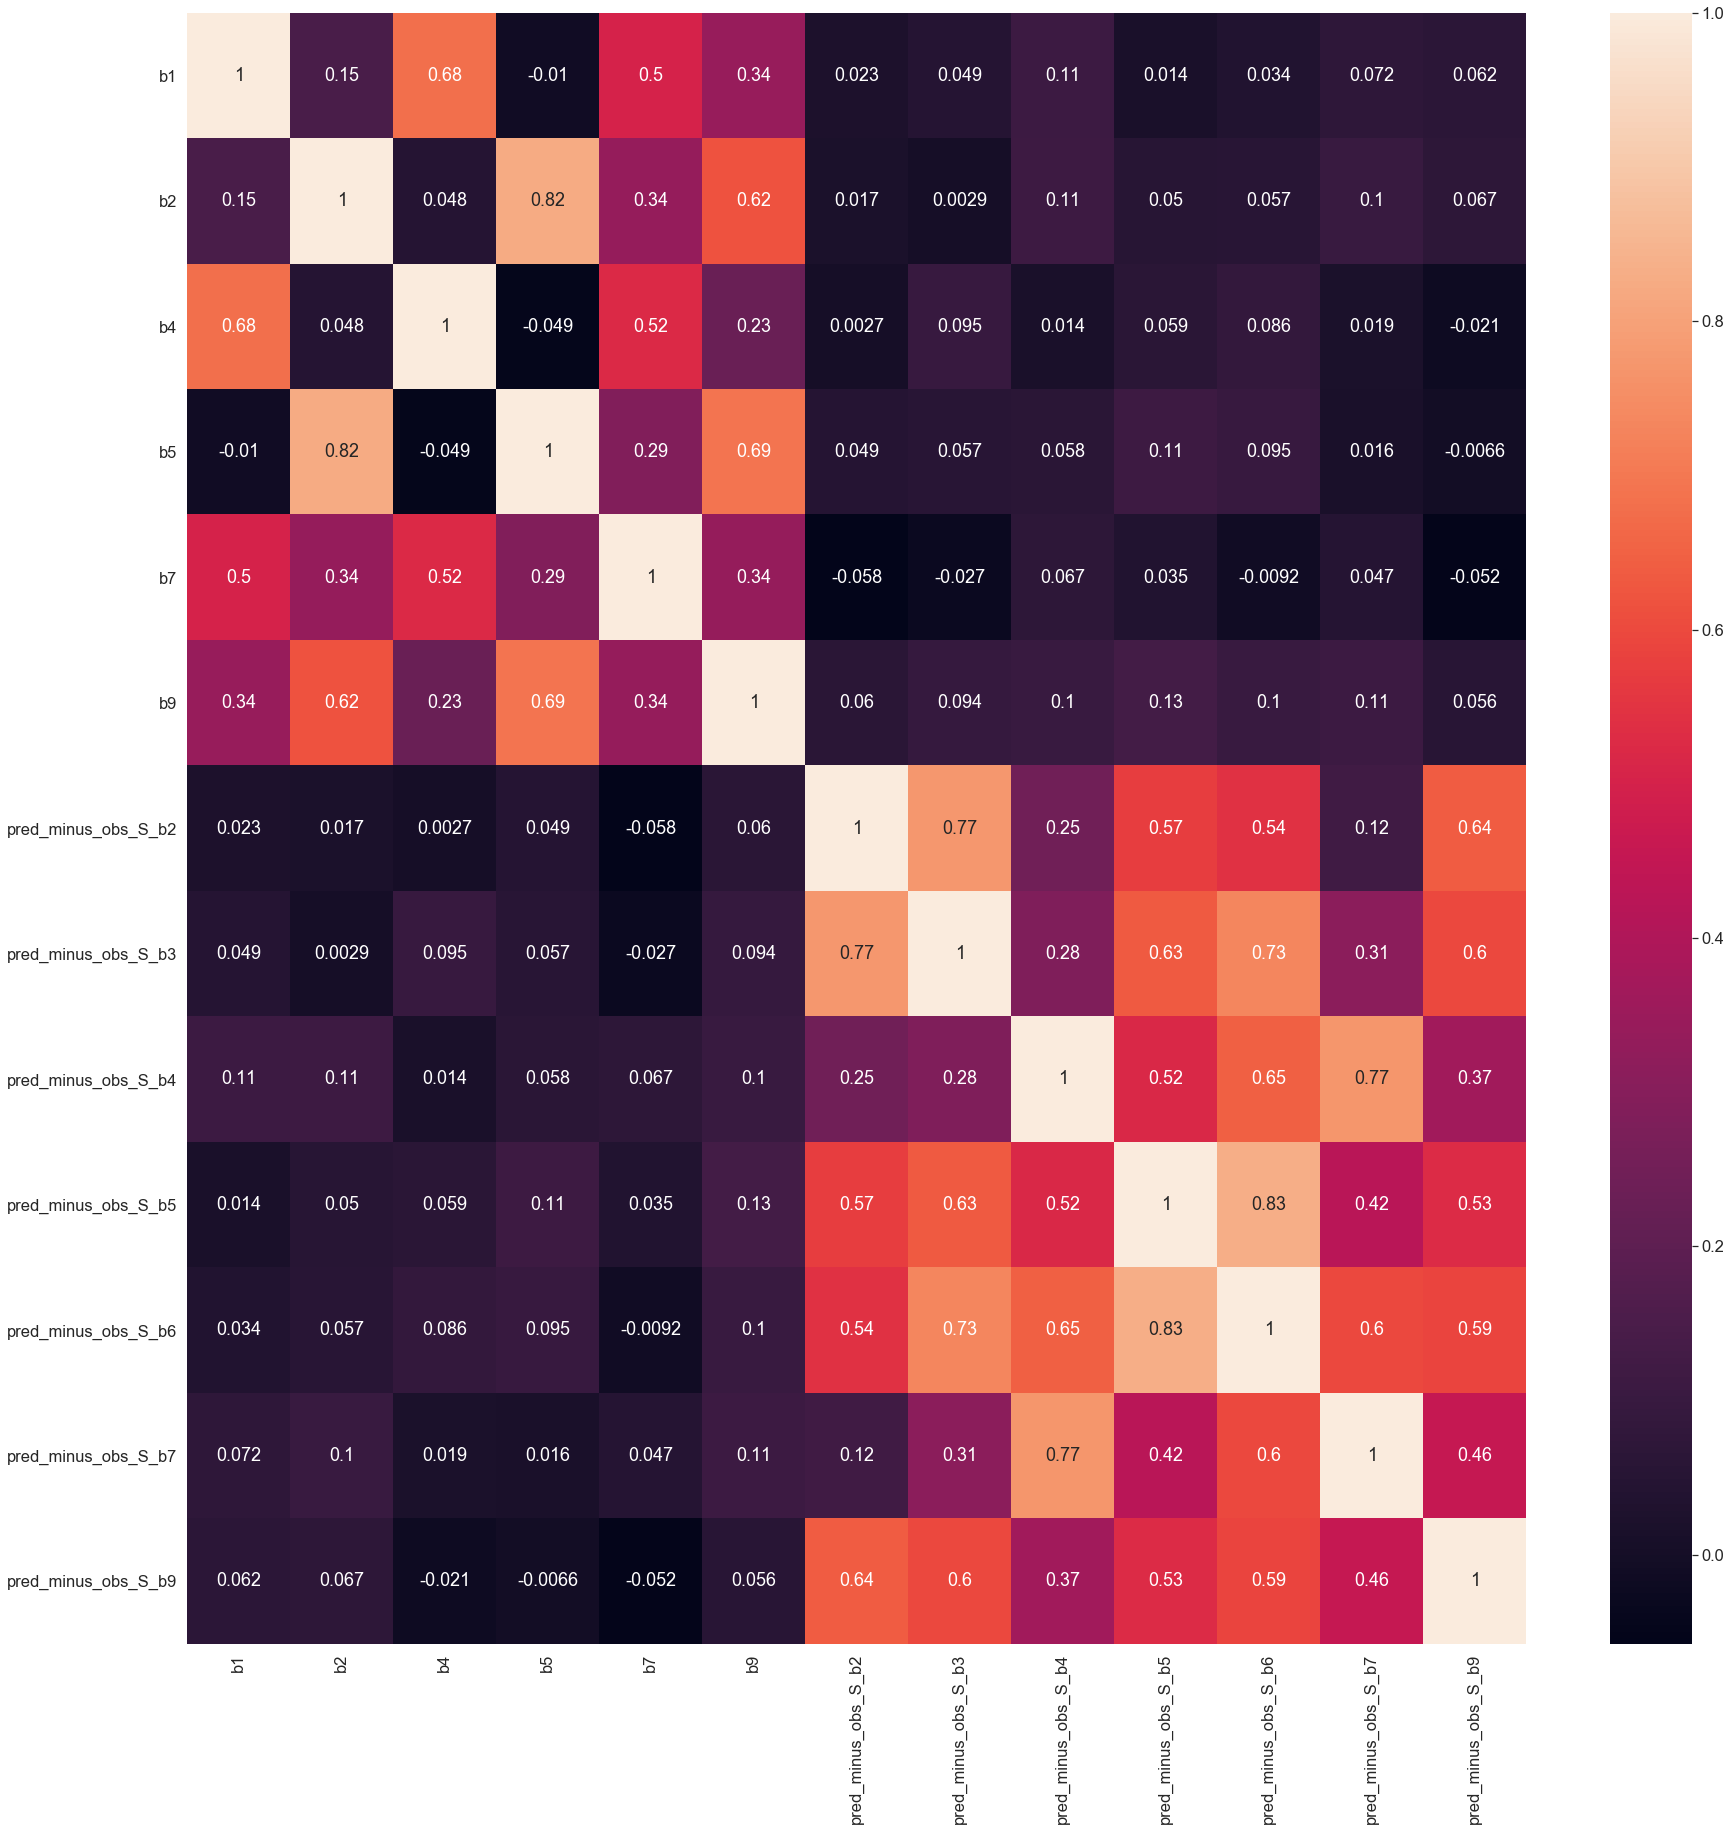

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), annot= True)

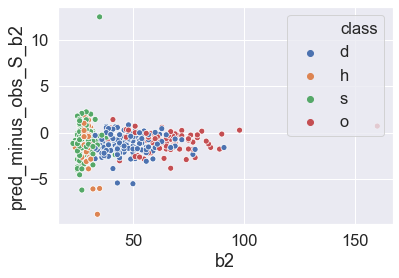

In [13]:
sns.scatterplot(df1['b2'],df1['pred_minus_obs_S_b2'], hue=df1['class'])

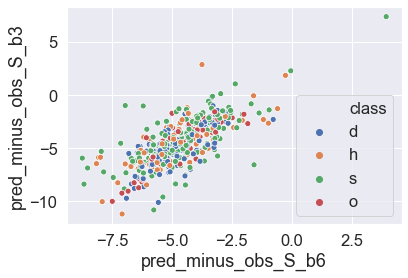

In [14]:
sns.scatterplot(df1['pred_minus_obs_S_b6'],df1['pred_minus_obs_S_b3'], hue=df1['class'])

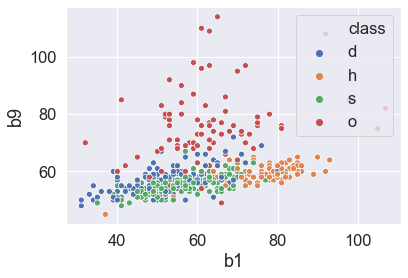

In [15]:
sns.scatterplot(df1['b1'],df1['b9'], hue=df1['class'])

In [16]:
df1['class'].unique()

array(['d ', 'h ', 's ', 'o '], dtype=object)

In [17]:
df1['class']= df1['class'].map({'d ':0, 'h ':1, 's ':2,'o ':3})
df1.head()

,class,b1,b2,b4,b5,b7,b9,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b9
0,0,39,36,91,59,93,60,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-7.86
1,1,84,30,112,51,92,62,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-10.83
2,2,53,25,99,51,84,58,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-7.07
3,2,59,26,103,47,82,56,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-10.81
4,0,57,49,103,64,114,59,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-5.84


In [18]:
df_train, df_test= train_test_split(df1, train_size=0.7, test_size=0.3, random_state=1)

In [19]:
y_train= df_train.pop('class')
X_train= df_train

In [20]:
scaler= MinMaxScaler()

In [21]:
cols= X_train.columns

In [22]:
X_train= scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train,columns= cols)

In [23]:
pca = PCA(svd_solver='randomized', random_state=42)

In [24]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

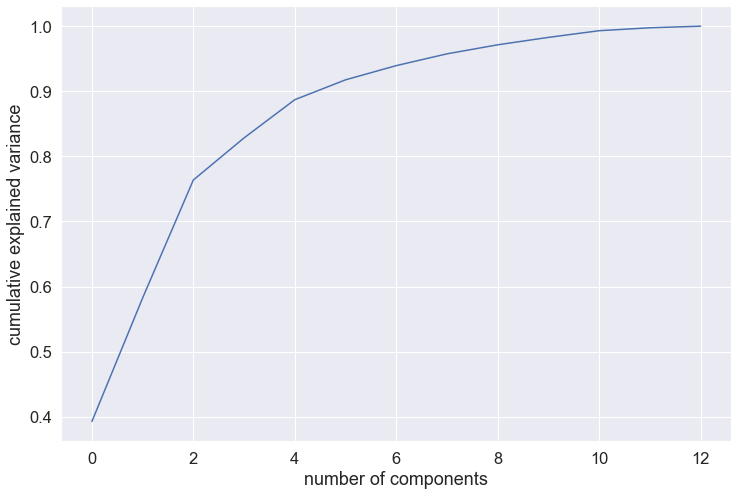

In [25]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [26]:
pca_final = IncrementalPCA(n_components=7)

In [27]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(366, 7)

In [28]:
y_test= df_test.pop('class')
X_test= df_test

In [29]:
cols= X_test.columns

In [30]:
X_test= scaler.transform(X_test)
X_test= pd.DataFrame(X_test,columns= cols)

In [31]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(157, 7)

In [32]:
model = SVC(C = 0.1, kernel='rbf')
model.fit(df_train_pca, y_train)
y_pred = model.predict(df_test_pca)

In [33]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  6,  2],
       [ 0, 16,  8,  0],
       [ 0,  0, 55,  0],
       [ 7,  0,  0, 20]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       1.00      0.67      0.80        24
           2       0.80      1.00      0.89        55
           3       0.91      0.74      0.82        27

    accuracy                           0.85       157
   macro avg       0.89      0.81      0.84       157
weighted avg       0.87      0.85      0.85       157



In [35]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

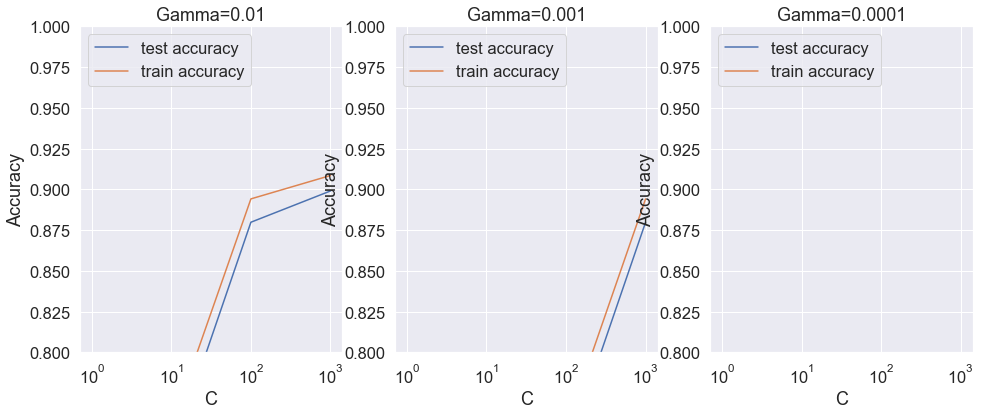

In [36]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [37]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.899000370233247 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [38]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(df_train_pca, y_train)
y_pred = model.predict(df_test_pca)

In [39]:
confusion_matrix(y_test,y_pred)

array([[45,  0,  4,  2],
       [ 0, 17,  7,  0],
       [ 0,  2, 53,  0],
       [ 2,  0,  0, 25]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.89      0.71      0.79        24
           2       0.83      0.96      0.89        55
           3       0.93      0.93      0.93        27

    accuracy                           0.89       157
   macro avg       0.90      0.87      0.88       157
weighted avg       0.90      0.89      0.89       157

